In [5]:
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
test = pd.read_csv('../data/raw/X_test.csv')
x_train = pd.read_csv('../data/raw/X_train.csv')
y_train = pd.read_csv('../data/raw/y_train.csv')
sample = pd.read_csv('../data/raw/sample_submission.csv')

In [7]:
sample.head()
# https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html
# xgboost multiclass classification

,series_id,surface
0,0,concrete
1,1,concrete
2,2,concrete
3,3,concrete
4,4,concrete


In [8]:
print(x_train.head())
print("-"*100)
print(y_train.head())

  row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.107650            0.017561   
1       -0.10490       -0.10600            0.067851            0.029939   
2       -0.10492       -0.10597            0.007275            0.028934   
3       -0.10495       -0.10597           -0.013053            0.019448   
4       -0.10495       -0.10596            0.005135            0.007652   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            0.000767               -0.

In [13]:
print(len(x_train['series_id'].unique()))
y_train.shape

3810


(3810, 3)

In [15]:
x_train[x_train['series_id'] == 0]

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.748570,2.103000,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.339950,1.506400,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.264290,1.592200,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.426840,1.099300,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.509690,1.468900,-10.4410
5,0_5,0,5,-0.75853,-0.63439,-0.10483,-0.10580,0.059664,0.013043,-0.013231,-0.447450,0.992810,-10.4020
6,0_6,0,6,-0.75853,-0.63441,-0.10481,-0.10569,0.082140,0.044356,-0.002696,-0.141630,0.734970,-9.4296
7,0_7,0,7,-0.75852,-0.63444,-0.10480,-0.10561,0.056218,0.038162,-0.022931,-0.121600,0.075417,-8.6088
8,0_8,0,8,-0.75851,-0.63445,-0.10485,-0.10559,-0.012846,0.039004,-0.007831,1.600000,0.816110,-7.6426
9,0_9,0,9,-0.75851,-0.63443,-0.10489,-0.10567,-0.090082,0.027299,-0.009970,0.474960,0.909600,-8.8120


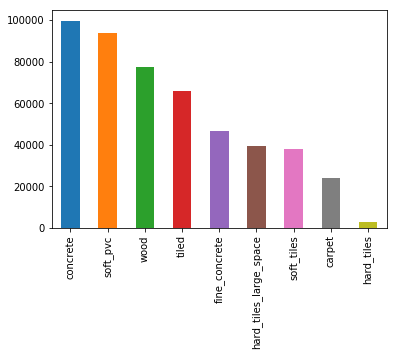

In [33]:
train['surface'].value_counts().plot.bar()

In [34]:
# decode surface to numbers
surface_list = list(set(train['surface'].tolist()))
train['surface_code'] = pd.Series([surface_list.index(train['surface'][i]) for i in range(0, len(train))])

In [35]:
train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface,surface_code
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,fine_concrete,3
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,13,fine_concrete,3
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,13,fine_concrete,3
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,13,fine_concrete,3
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,13,fine_concrete,3


In [29]:
cols = [
    'orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W',
    'angular_velocity_X', 'angular_velocity_Y', 'angular_velocity_Z',
    'linear_acceleration_X', 'linear_acceleration_Y', 'linear_acceleration_Z',
    #'surface_code'
]

In [39]:
train_X = train[cols]
train_y = train['surface_code']

In [40]:
train_X.head()

,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [49]:
params = {'objective': 'multi:softprob',
                      'eval_metric': 'mlogloss',
                      'colsample_bytree': 0.55,
                      'min_child_weight': 9.0, 
                      'subsample': 1.0, 
                      'learning_rate': 0.03,
                      'eta': 0.2, 
                      'max_depth': 7, 
                      'gamma': 0.75,
                      'num_class': 9,
                      'n_estimators': 580.0
                      }

In [41]:
dtrain = xgb.DMatrix(train_X, label=train_y)

In [44]:
test_X = test[cols]

In [45]:
dtest = xgb.DMatrix(test_X)

In [50]:
bst = xgb.train(params, dtrain, 32)
test_y = bst.predict(dtest)

[15:38:52] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 8 pruned nodes, max_depth=7
[15:38:53] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[15:38:53] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 4 pruned nodes, max_depth=7
[15:38:53] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=7
[15:38:53] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=7
[15:38:53] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 10 pruned nodes, max_depth=7
[15:38:53] /opt/conda/conda-bld/xg

[15:39:00] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 6 pruned nodes, max_depth=7
[15:39:00] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 6 pruned nodes, max_depth=7
[15:39:00] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 4 pruned nodes, max_depth=7
[15:39:00] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 4 pruned nodes, max_depth=7
[15:39:01] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=7
[15:39:01] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 6 pruned nodes, max_depth=7
[15:39:01] /opt/conda/conda-bld/xgb

[15:39:07] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 2 pruned nodes, max_depth=7
[15:39:08] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 8 pruned nodes, max_depth=7
[15:39:08] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 4 pruned nodes, max_depth=7
[15:39:08] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=7
[15:39:08] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 6 pruned nodes, max_depth=7
[15:39:08] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 4 pruned nodes, max_depth=7
[15:39:08] /opt/conda/conda-bld/xgb

[15:39:14] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 10 pruned nodes, max_depth=7
[15:39:14] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=7
[15:39:14] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 2 pruned nodes, max_depth=7
[15:39:15] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 10 pruned nodes, max_depth=7
[15:39:15] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 4 pruned nodes, max_depth=7
[15:39:15] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=7
[15:39:15] /opt/conda/conda-bld/x

[15:39:20] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=7
[15:39:21] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 2 pruned nodes, max_depth=7
[15:39:21] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 2 pruned nodes, max_depth=7
[15:39:21] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 18 pruned nodes, max_depth=7
[15:39:21] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[15:39:21] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 2 pruned nodes, max_depth=7
[15:39:21] /opt/conda/conda-bld/xg

[15:39:28] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 4 pruned nodes, max_depth=7
[15:39:28] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=7
[15:39:28] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 2 pruned nodes, max_depth=7
[15:39:28] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 2 pruned nodes, max_depth=7
[15:39:28] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 10 pruned nodes, max_depth=7
[15:39:28] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 16 pruned nodes, max_depth=7
[15:39:29] /opt/conda/conda-bld/x

In [51]:
test_y

array([[0.08141077, 0.075636  , 0.080517  , ..., 0.20777431, 0.07314806,
        0.21087891],
       [0.08933529, 0.0830657 , 0.08497136, ..., 0.2004693 , 0.07979561,
        0.17946833],
       [0.09000729, 0.08336512, 0.08009754, ..., 0.17129862, 0.08007918,
        0.16939823],
       ...,
       [0.05846076, 0.06434582, 0.05816396, ..., 0.11139289, 0.05588746,
        0.05723802],
       [0.05861201, 0.06328469, 0.05874302, ..., 0.10955588, 0.05496579,
        0.05629408],
       [0.05747861, 0.0632648 , 0.06120231, ..., 0.10952145, 0.05494853,
        0.0562764 ]], dtype=float32)

In [52]:
preds = np.asarray([np.argmax(line) for line in test_y])

In [55]:
print(len(preds))
print(test.shape)

488448
(488448, 13)


In [59]:
series_id = test['series_id']
submission_df = { 'series_id': series_id,
                'surface_code': preds}
subs = pd.DataFrame(submission_df)

In [95]:
preds

array([8, 6, 6, ..., 5, 5, 5])

In [83]:
# https://thispointer.com/python-how-to-convert-a-list-to-dictionary/
# surface_list
surface_dict = { i : surface_list[i] for i in range(0, len(surface_list))}
surface_dict

{0: 'concrete',
 1: 'soft_pvc',
 2: 'soft_tiles',
 3: 'fine_concrete',
 4: 'tiled',
 5: 'wood',
 6: 'carpet',
 7: 'hard_tiles',
 8: 'hard_tiles_large_space'}

In [85]:
# subs['surface_code'].value_counts()
subs['surface'] = subs['surface_code'].map(surface_dict)

In [88]:
submission = subs[['series_id', 'surface']]
submission.to_csv('../data/processed/submission.csv', index=False)